<a href="https://colab.research.google.com/github/shahalam1111/Wine-Red-Quality-Prediction/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# **Data Collection**

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.shape

(1599, 12)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# **Data Analysis and Visualization**

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='quality', ylabel='count'>

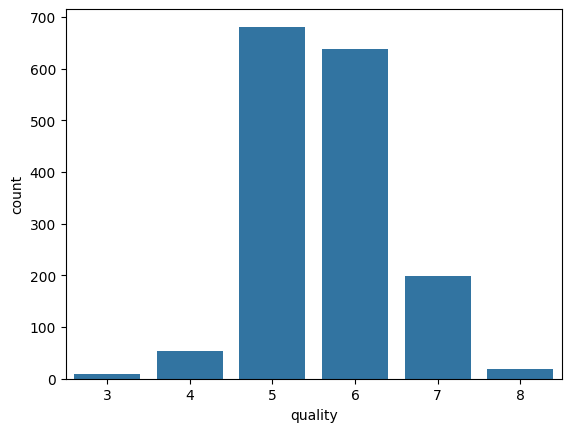

In [7]:
# number of values for each quality
sns.countplot(x='quality', data = df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

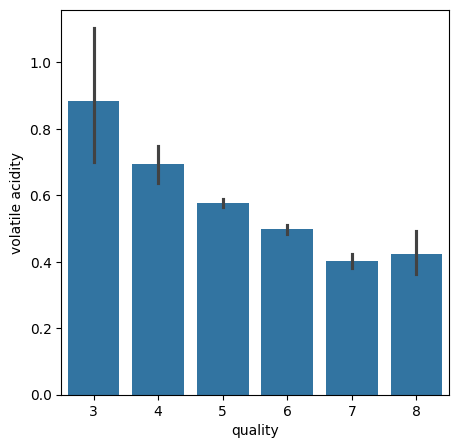

In [8]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = df)

So increase in 'volatile acidity' results reduce in 'quality' of wine

<Axes: xlabel='quality', ylabel='citric acid'>

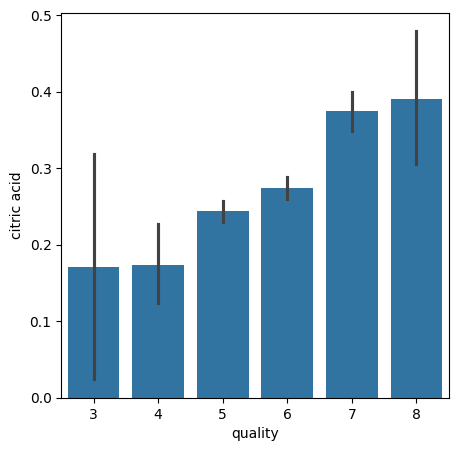

In [9]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = df)

So increse in concentration of 'citric acid' rusults increase in 'quality' of wine

# Correlation

1. Positive correlation
2. Negative correlation

In [10]:
correlation = df.corr()

<Axes: >

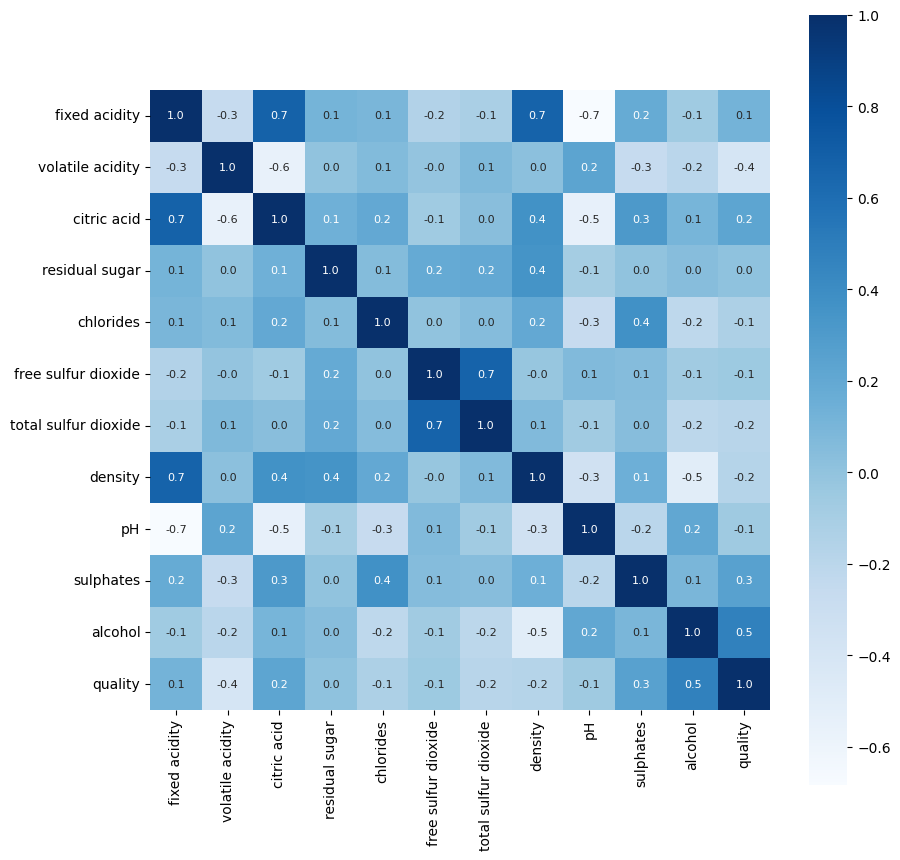

In [11]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

# **Data preprocessing**

In [12]:
# separate the data and Label
X = df.drop('quality',axis=1)

# Label Binarizaton

In [13]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

# Train , Test & Split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# **Model Training**

# Random Forest Classifier

In [15]:
model = RandomForestClassifier()

In [16]:
model.fit(X_train, Y_train)

RandomForestClassifier()

# **Model Evaluation**

# Accuracy Score

In [17]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [18]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.93125


# Building a Predictive System

In [19]:
df.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
741,9.2,0.530,0.24,2.6,0.078,28.0,139.0,0.99788,3.21,0.57,9.5,5
1500,7.5,0.725,0.04,1.5,0.076,8.0,15.0,0.99508,3.26,0.53,9.6,5
434,10.4,0.410,0.55,3.2,0.076,22.0,54.0,0.99960,3.15,0.89,9.9,6
1311,6.5,0.510,0.15,3.0,0.064,12.0,27.0,0.99290,3.33,0.59,12.8,6
1040,7.4,0.965,0.00,2.2,0.088,16.0,32.0,0.99756,3.58,0.67,10.2,5


In [20]:
input_data = (7.2,0.360,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Random Forest Hyperparameter Tuning**

In [27]:
from sklearn.metrics import classification_report

In [29]:
report = classification_report(X_test_prediction, Y_test)

In [31]:
report_dict = classification_report(X_test_prediction, Y_test, output_dict=True)
score = pd.DataFrame(report_dict).transpose()
display(score)

,precision,recall,f1-score,support
0,0.978799,0.945392,0.961806,293.00000
1,0.567568,0.777778,0.656250,27.00000
accuracy,0.931250,0.931250,0.931250,0.93125
macro avg,0.773183,0.861585,0.809028,320.00000
weighted avg,0.944101,0.931250,0.936024,320.00000


# **K-fold cross-validation**

In [21]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC



# Create SVM classifier

In [23]:
svm_classifier = SVC(kernel='linear')


# Define the number of folds for cross-validation

In [24]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation

In [25]:
cross_val_results = cross_val_score(svm_classifier, X, Y, cv=kf)

In [26]:
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.853125   0.86875    0.8625     0.859375   0.87774295]
Mean Accuracy: 0.8642985893416928
